<a href="https://colab.research.google.com/github/AndBalbino/TechChallengerFiap_EconomicosAnalise/blob/main/AnaliseSimplesDadosEconomicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta-guia central da análise
Em quais países faz mais sentido investir esforços considerando o cenário econômio?


## Perguntas norteadoras
- Quais países tem o maior PIB?
- Quais países tem as maiores e menores inflações?
- A inflação elevada está concentrada em algum grupo de países relevantes?
- Quais países tem os melhores pib per capita?
- Quais países mais cresceram?
- Quais países têm moeda forte (taxa de câmbio baixa) e alta renda bruta per capita?


In [39]:
# Importação de LIBS para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_economiaPaises = pd.read_csv('/content/DadosEconomicos_Organizados.csv')
df_economiaPaises.head(50)

,pais,ano,codigo_pais,pib_usd_corrente,pib_per_capita_usd,crescimento_pib_anual,inflacao_anual,taxa_cambio_local_usd,renda_bruta_per_capita_usd
0,Afghanistan,2009,AFG,1.241615e+10,452.050000,21.390000,-6.81,50.320,460.000000
1,Afghanistan,2010,AFG,1.585667e+10,560.620000,14.360000,2.18,46.450,530.000000
2,Afghanistan,2011,AFG,1.780510e+10,606.690000,0.430000,11.80,46.750,550.000000
3,Afghanistan,2012,AFG,1.990733e+10,651.420000,12.750000,6.44,50.920,640.000000
4,Afghanistan,2013,AFG,2.014642e+10,637.090000,5.600000,7.39,55.380,670.000000
5,Afghanistan,2014,AFG,2.049713e+10,625.050000,2.720000,4.67,57.250,640.000000
6,Afghanistan,2015,AFG,1.913422e+10,565.570000,1.450000,-0.66,61.140,590.000000
7,Afghanistan,2016,AFG,1.811657e+10,522.080000,2.260000,4.38,67.870,560.000000
8,Afghanistan,2017,AFG,1.875346e+10,525.470000,2.650000,4.98,68.030,530.000000
9,Afghanistan,2018,AFG,1.805322e+10,491.340000,1.190000,0.63,72.080,520.000000


In [40]:
df_economiaPaises.info()
df_economiaPaises.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pais                        3472 non-null   object 
 1   ano                         3472 non-null   int64  
 2   codigo_pais                 3472 non-null   object 
 3   pib_usd_corrente            3424 non-null   float64
 4   pib_per_capita_usd          3424 non-null   float64
 5   crescimento_pib_anual       3424 non-null   float64
 6   inflacao_anual              3072 non-null   float64
 7   taxa_cambio_local_usd       3392 non-null   float64
 8   renda_bruta_per_capita_usd  3296 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 244.3+ KB


(3472, 9)

In [41]:
# Lista de exclusão dos países futuramente
paises_para_excluir = ['Albania', 'American Samoa', 'Andorra', 'Armenia', 'Azerbaijan', 'Belarus', 'Belarus', 'Botswana', 'Brunei Darussalam', 'Burundi', 'Cambodia', 'Chad',
                       'Channel Islands', 'Djibouti', 'Eritrea' 'Faroe Islands', 'Fiji', 'Gambia, The', 'Georgia', 'Greenland', 'Guam', 'Guinea', 'Iceland', 'Israel', 'Kazakhstan',
                       'Kiribati', 'Kosovo', 'Lao PDR', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Madagascar', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
                        'Monaco', 'Mongolia', 'Morocco', 'Myanmar', 'Nauru', 'Nepal', 'North Macedonia', 'Northern Mariana Islands', 'Pakistan', 'Romania', 'Rwanda', 'San Marino',
                       'Seychelles', 'Sint Maarten (Dutch part)', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sri Lanka', 'St. Lucia', 'St. Martin (French part)', 'Sudan',
                       'Syrian Arab Republic', ' Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Turks and Caicos Islands', 'Uganda', 'Ukraine', 'Uzbekistan', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']


In [42]:
# Excluir os paises da lista de paises para excluir do conjunto de dados
df_economiaPaises = df_economiaPaises[~df_economiaPaises['pais'].isin(paises_para_excluir)]

In [43]:
#Verificando os anos com inflação ausentes para a Argentina
df_economiaPaises[(df_economiaPaises['pais'] == 'Argentina') & (df_economiaPaises['inflacao_anual'].isna())]

,pais,ano,codigo_pais,pib_usd_corrente,pib_per_capita_usd,crescimento_pib_anual,inflacao_anual,taxa_cambio_local_usd,renda_bruta_per_capita_usd
112,Argentina,2009,ARG,3.329765e+11,8150.24,-5.92,NaN,3.71,7720.0
113,Argentina,2010,ARG,4.236274e+11,10260.13,10.13,NaN,3.90,9160.0
114,Argentina,2011,ARG,5.301581e+11,12704.28,6.00,NaN,4.11,10590.0
115,Argentina,2012,ARG,5.459824e+11,12949.72,-1.03,NaN,4.54,11770.0
116,Argentina,2013,ARG,5.520251e+11,12963.68,2.41,NaN,5.46,12760.0
117,Argentina,2014,ARG,5.263197e+11,12233.14,-2.51,NaN,8.08,12240.0
118,Argentina,2015,ARG,5.947493e+11,13679.63,2.73,NaN,9.23,12500.0
119,Argentina,2016,ARG,5.575323e+11,12699.96,-2.08,NaN,14.76,12130.0
120,Argentina,2017,ARG,6.436284e+11,14532.50,2.82,NaN,16.56,13070.0
121,Argentina,2018,ARG,5.248199e+11,11752.80,-2.62,NaN,28.09,12390.0


In [44]:
# Adicionando a inflação da argentina de maneira manual
inflacao_argentina = {
    2009: 7.70,
    2010: 10.90,
    2011: 9.50,
    2012: 10.80,
    2013: 10.90,
    2014: 30.10,
    2015: 30.00,
    2016: 41.00,
    2017: 24.80,
    2018: 47.60,
    2019: 53.80,
    2020: 43.5,
    2021: 39.40,
    2022: 94.80,
    2023: 211.4,
    2024: 117.80
}



In [45]:
# Preenchendo os NaNs da coluna de inflação da argentina com o discionário da variavel inflacao_argentina
for ano, inflacao in inflacao_argentina.items():
  df_economiaPaises.loc[(df_economiaPaises['pais'] == 'Argentina') & (df_economiaPaises['ano'] == ano), 'inflacao_anual'] = inflacao

In [46]:
df_economiaPaises[df_economiaPaises['pais'] == 'Argentina'][['ano', 'inflacao_anual']]

,ano,inflacao_anual
112,2009,7.7
113,2010,10.9
114,2011,9.5
115,2012,10.8
116,2013,10.9
117,2014,30.1
118,2015,30.0
119,2016,41.0
120,2017,24.8
121,2018,47.6


In [47]:
# Código para ver todos os países que não tem valores na coluna de inflacao_anual
df_sem_inflacao = df_economiaPaises[df_economiaPaises['inflacao_anual'].isna()]
paises_sem_inflacao = df_sem_inflacao['pais'].unique()
print(paises_sem_inflacao)

['Bermuda' 'British Virgin Islands' 'Cuba' 'Eritrea' 'Faroe Islands'
 'French Polynesia' 'Gibraltar' 'Isle of Man' "Korea, Dem. People's Rep."
 'Marshall Islands' 'Puerto Rico (US)' 'Virgin Islands (U.S.)']


In [48]:
# Mostrar os nomes unicos dos países na coluna de pais
df_economiaPaises['pais'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Finland', 'France', 'French Polynesia', 'Gabon',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong

In [49]:
#Removendo das análises os países que são proibidos consumir  álcool
paises_sem_alcool = ['Saudi Arabia', 'Iran, Islamic Rep.', 'Afghanistan', 'Kuwait', 'Bangladesh', 'Qatar', 'Mauritania']

In [50]:
# Removendo os países que não consomem alcool do conjunto de dados, mas sem expluir
df_economiaPaises = df_economiaPaises[~df_economiaPaises['pais'].isin(paises_sem_alcool)]

In [51]:
# KPIs de monitoramento
kpis = [
    "pib_usd_corrente",
    "pib_per_capita_usd",
    "crescimento_pib_anual",
    "inflacao_anual",
    "taxa_cambio_local_usd",
    "renda_bruta_per_capita_usd"
]

# Contagem de NaNs por KPI
print("NaNs por KPI:")
display(df_economiaPaises[kpis].isna().sum())

# Países que têm pelo menos um NaN em qualquer KPI
df_na = df_economiaPaises[df_economiaPaises[kpis].isna().any(axis=1)]
paises_com_na = (
    df_na.groupby("pais")[kpis]
         .apply(lambda x: x.isna().sum().sum())   # total NaNs por país
         .sort_values(ascending=False)
)


print("\nTop 10 países com mais NaNs:")
display(paises_com_na.head(10))


NaNs por KPI:


,0
pib_usd_corrente,48
pib_per_capita_usd,48
crescimento_pib_anual,48
inflacao_anual,192
taxa_cambio_local_usd,48
renda_bruta_per_capita_usd,64



Top 10 países com mais NaNs:


,0
pais,
British Virgin Islands,96
"Korea, Dem. People's Rep.",96
Gibraltar,80
Cuba,32
Virgin Islands (U.S.),32
Bermuda,16
Eritrea,16
Faroe Islands,16
Isle of Man,16


In [52]:
# Identificando NaN e atribuindo uma média
for col in kpis:
    df_economiaPaises[col] = df_economiaPaises.groupby("pais")[col].transform(
        lambda x: x.fillna(x.mean())
    )

In [53]:
# Paises para descartar
paises_descartar = ["Korea, Dem. People's Rep.", 'Channel Islands', 'Monaco', 'Greenland', 'Guam', 'American Samoa']

df_economiaPaises = df_economiaPaises[~df_economiaPaises['pais'].isin(paises_descartar)]

In [54]:
df_economiaPaises.isna().sum()

,0
pais,0
ano,0
codigo_pais,0
pib_usd_corrente,32
pib_per_capita_usd,32
crescimento_pib_anual,32
inflacao_anual,176
taxa_cambio_local_usd,32
renda_bruta_per_capita_usd,48


In [55]:
df_economiaPaises.describe()

,ano,pib_usd_corrente,pib_per_capita_usd,crescimento_pib_anual,inflacao_anual,taxa_cambio_local_usd,renda_bruta_per_capita_usd
count,2272.000000,2.240000e+03,2240.000000,2240.000000,2096.000000,2240.000000,2224.000000
mean,2016.500000,5.680482e+11,19606.238307,2.596780,5.464888,490.344863,18572.586948
std,4.610787,2.158177e+12,24229.192048,5.236727,13.281505,2907.088204,22570.020372
min,2009.000000,2.807698e+07,280.800000,-54.340000,-4.450000,0.380000,280.000000
25%,2012.750000,7.672863e+09,3239.797500,0.717500,1.200000,1.000000,3180.000000
50%,2016.500000,4.589392e+10,8643.670000,2.765000,2.860000,6.700000,8095.000000
75%,2020.250000,3.186400e+11,27428.817500,4.932500,5.632500,98.722500,25060.000000
max,2024.000000,2.918489e+13,138934.960000,75.060000,254.950000,89500.000000,140280.000000


### As 15 maiores economias do mundo no ano de 2024


In [56]:
# Filtrar apenas o ano de 2024
df_2024 = df_economiaPaises[df_economiaPaises["ano"] == 2024]

# Ordenar as maiores economias do ano de 2024 do maior para o menor
maioresEconomiasPaises = (
    df_2024[["pais", "pib_usd_corrente"]]
    .sort_values(by="pib_usd_corrente", ascending=False)
    .reset_index(drop=True)
)

# 3. Exibir os 15 países mais ricos em 2024
maioresEconomiasPaises = maioresEconomiasPaises.head(15) #abri visualização só na tabela
maioresEconomiasPaises

,pais,pib_usd_corrente
0,United States,2.918489e+13
1,China,1.874380e+13
2,Germany,4.659929e+12
3,Japan,4.026211e+12
4,India,3.912686e+12
5,United Kingdom,3.643834e+12
6,France,3.162079e+12
7,Italy,2.372775e+12
8,Canada,2.241253e+12
9,Brazil,2.179412e+12


/tmp/ipython-input-57-1701494741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(maioresEconomiasPaises, y='pais', x='pib_usd_corrente', palette='viridis')


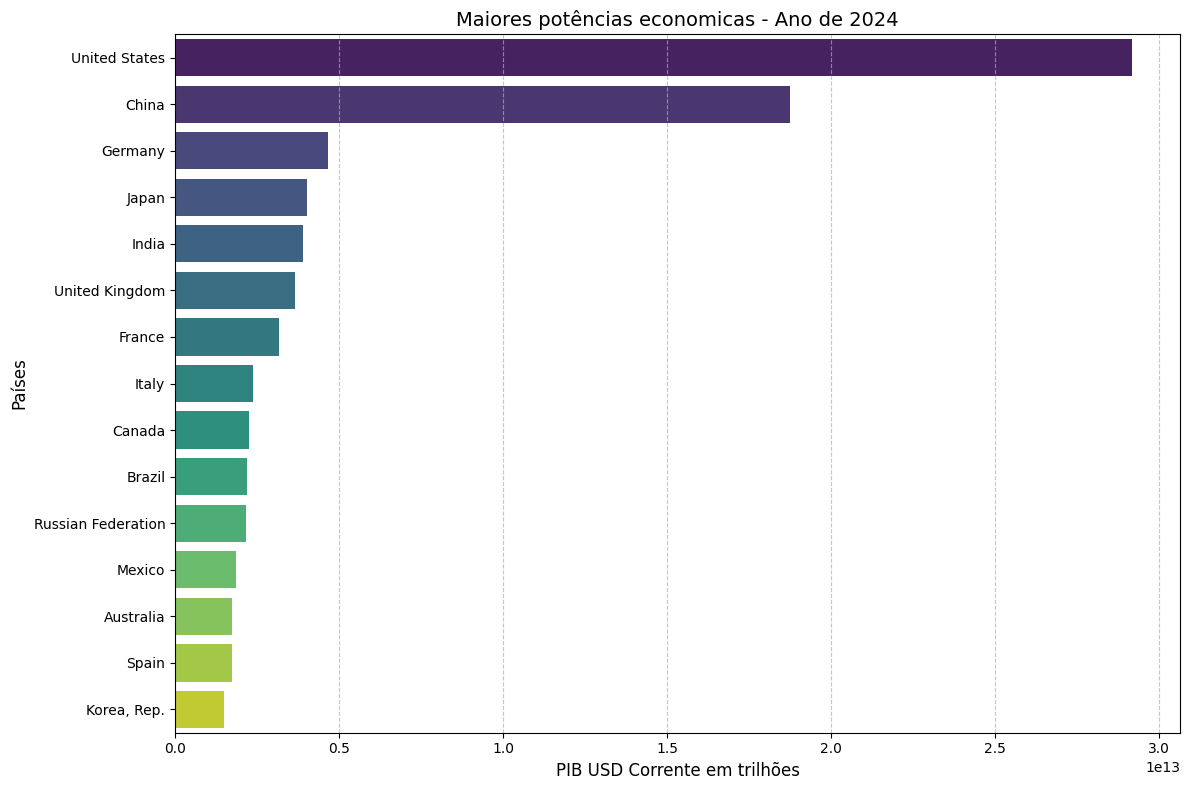

In [57]:
# Maiores economias mundiais

plt.figure(figsize=(12, 8))
sns.barplot(maioresEconomiasPaises, y='pais', x='pib_usd_corrente', palette='viridis')

# Personalizar o gráfico
plt.title('Maiores potências economicas - Ano de 2024', fontsize=14)
plt.xlabel('PIB USD Corrente em trilhões', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Top 15 países com as maiores inflações no ano de 2024

In [76]:
# Filtrando o ano de 2024 e descartando países sem dado de inflação
df_infla2024 = df_economiaPaises[(df_economiaPaises["ano"] == 2024) & (df_economiaPaises["inflacao_anual"].notna())]

# Ordenando do maior para o menor e pegando só os 15 primeiros
maioresInflacoesPaises = (
    df_2024[["pais", "inflacao_anual"]]
    .sort_values(by="inflacao_anual", ascending=False)
    .head(15) #abri visualização na tabela
    .reset_index(drop=True)
)

maioresInflacoesPaises


,pais,inflacao_anual
0,Argentina,117.80000
1,"Venezuela, RB",72.74125
2,Turkiye,58.51000
3,Lebanon,45.24000
4,Nigeria,33.24000
5,Malawi,32.18000
6,Sierra Leone,28.63000
7,"Egypt, Arab Rep.",28.27000
8,Angola,28.24000
9,Haiti,26.95000


**Maiores inflações**
1- Argentina 117,80
9- Haiti 26,95
17- Russia 6,94
26 - India 4,95
27-Uruguai 4,85
28-Mexico 4,72
**34 - Brasil 4,37**
35 - Africa do Sul
36- Chile - 4,30


/tmp/ipython-input-77-615059187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresInflacoesPaises, y="pais", x="inflacao_anual", palette="Reds_r")


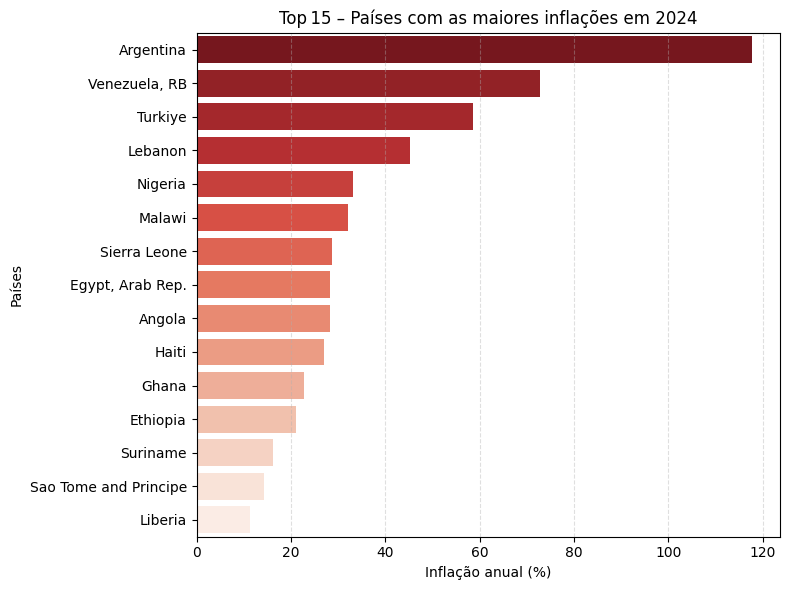

In [77]:
# Gráfico de barras para ver os países com maiores inflações de 2024
plt.figure(figsize=(8,6))
sns.barplot(data=maioresInflacoesPaises, y="pais", x="inflacao_anual", palette="Reds_r")
plt.title("Top 15 – Países com as maiores inflações em 2024")
plt.xlabel("Inflação anual (%)")
plt.ylabel("Países")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

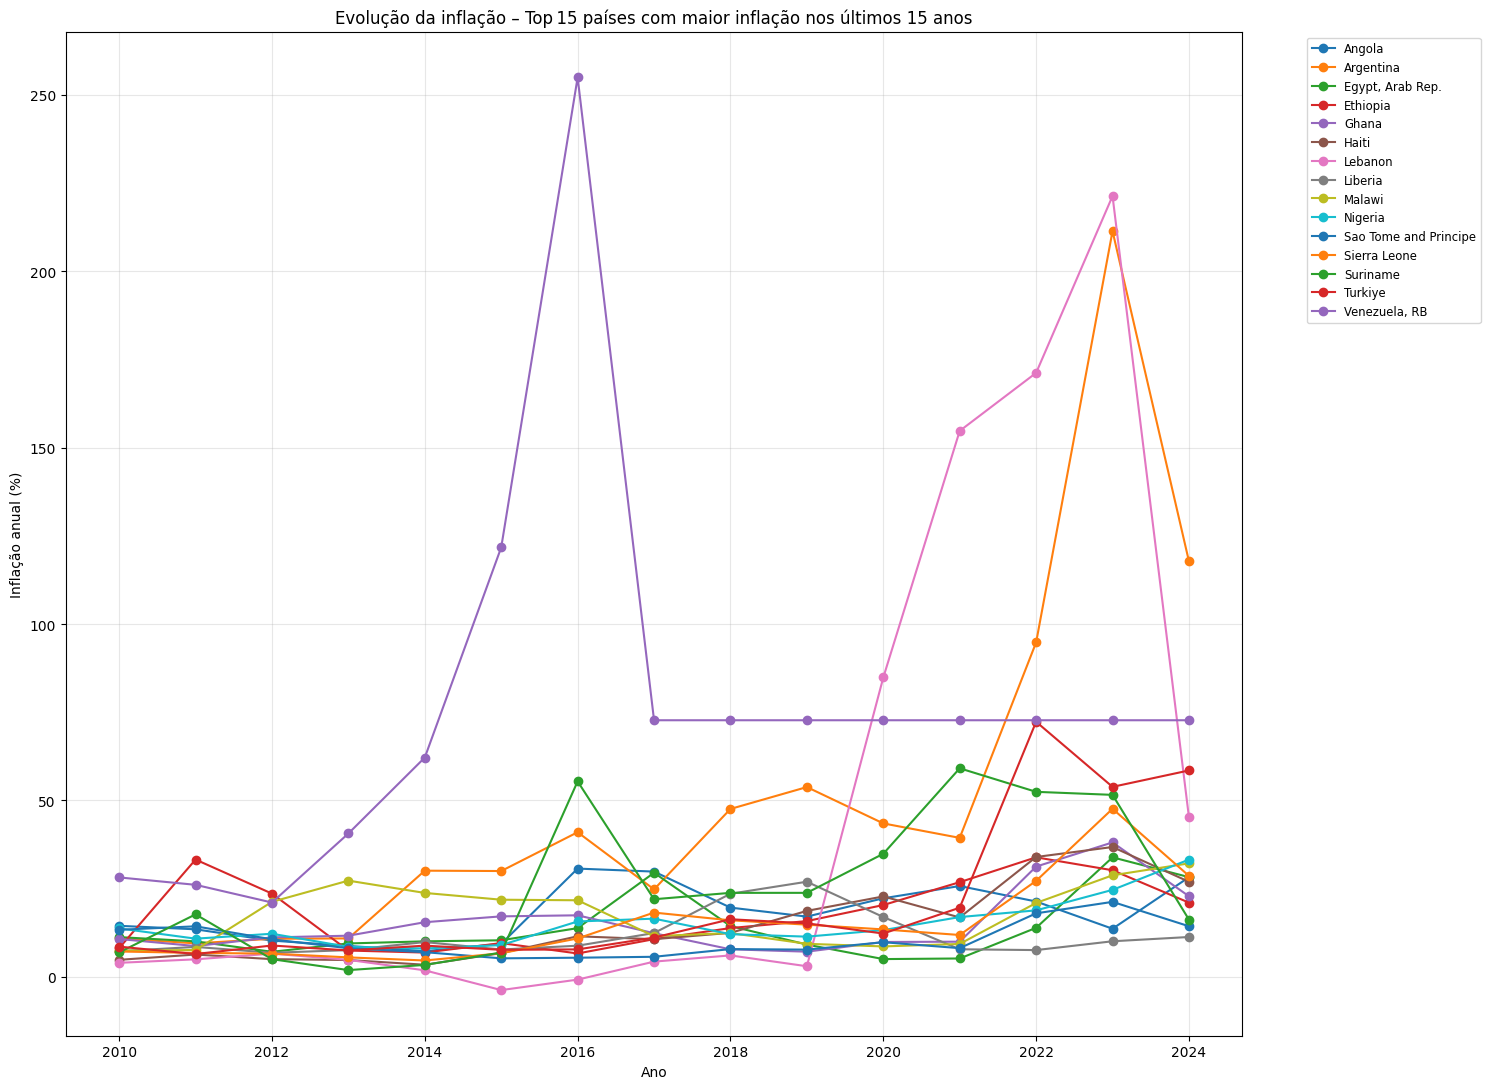

In [78]:
# Lista dos países com maior inflação
top20MaioresInfla = maioresInflacoesPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países
df_infla_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(top20MaioresInfla)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de linhas múltiplas
plt.figure(figsize=(15,11))
for pais, sub in df_infla_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["inflacao_anual"], marker="o", label=pais)

plt.title("Evolução da inflação – Top 15 países com maior inflação nos últimos 15 anos")
plt.xlabel("Ano")
plt.ylabel("Inflação anual (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Paises com as menores inflações

In [79]:
# Ordenando do menor para o maior e pegando só os 15 primeiros
menoresInfla_2024 = (
    df_2024[["pais", "inflacao_anual"]]
    .sort_values(by="inflacao_anual", ascending=True)
    .head(15) #abrindo visualização na tabela
    .reset_index(drop=True)
)

menoresInfla_2024

,pais,inflacao_anual
0,Barbados,-0.460000
1,Costa Rica,-0.410000
2,China,0.220000
3,"Bahamas, The",0.410000
4,Cayman Islands,0.464286
5,Tuvalu,0.500000
6,Trinidad and Tobago,0.530000
7,Papua New Guinea,0.600000
8,Panama,0.690000
9,Senegal,0.800000


**PAÍSES COM MENORES INFLAÇÕES**
2- China - 0,22
42 - Alemanha - 2,26
45 - Canadá - 2,38
47 - Portugal - 2,42
52 - Japao - 2,74
55 - Espanha - 2,77





/tmp/ipython-input-80-2620633006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=menoresInfla_2024, y="pais", x="inflacao_anual", palette="Blues")


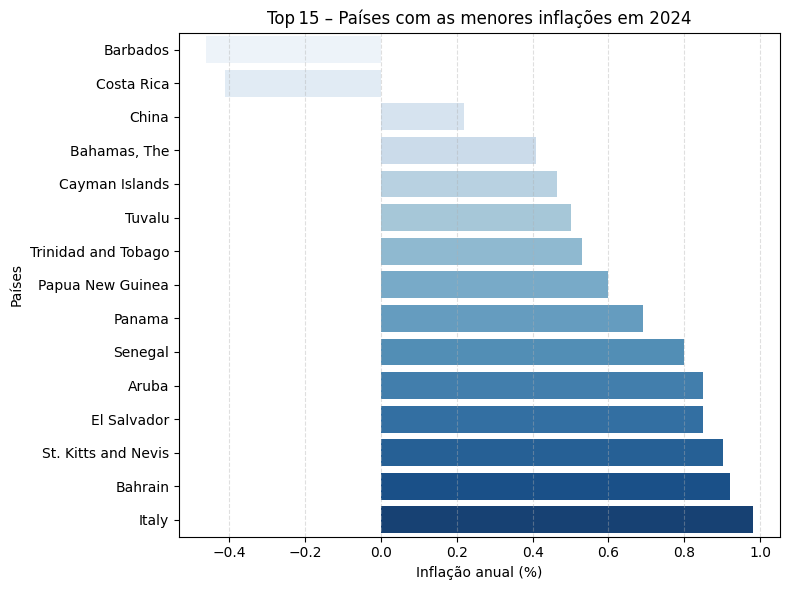

In [80]:
# Gráfico de barras para ver os países com maiores inflações de 2024
plt.figure(figsize=(8,6))
sns.barplot(data=menoresInfla_2024, y="pais", x="inflacao_anual", palette="Blues")
plt.title("Top 15 – Países com as menores inflações em 2024")
plt.xlabel("Inflação anual (%)")
plt.ylabel("Países")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Top 15 países com as maiores receitas médias individuais de 2024


Acredito que essa métrica não é interessante por dividir pela população, criando um viés do tamanho do país.

In [63]:
# Filtrar ano de 2024 e tirar países sem renda bruta per capita
df_renda_2024 = df_economiaPaises[(df_economiaPaises["ano"] == 2024) & (df_economiaPaises["renda_bruta_per_capita_usd"].notna())]

# Ordenar do maior para o menor
maioresRendasPaises = (
    df_renda_2024[["pais", "renda_bruta_per_capita_usd"]]
    .sort_values(by="renda_bruta_per_capita_usd", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

maioresRendasPaises


,pais,renda_bruta_per_capita_usd
0,Bermuda,140280.000000
1,Norway,98280.000000
2,Switzerland,95900.000000
3,Luxembourg,91470.000000
4,United States,83660.000000
5,Isle of Man,78211.428571
6,Ireland,77920.000000
7,Singapore,74750.000000
8,Denmark,73790.000000
9,Netherlands,62840.000000


/tmp/ipython-input-64-187480061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresRendasPaises, y="pais", x="renda_bruta_per_capita_usd", palette="Greens_r")


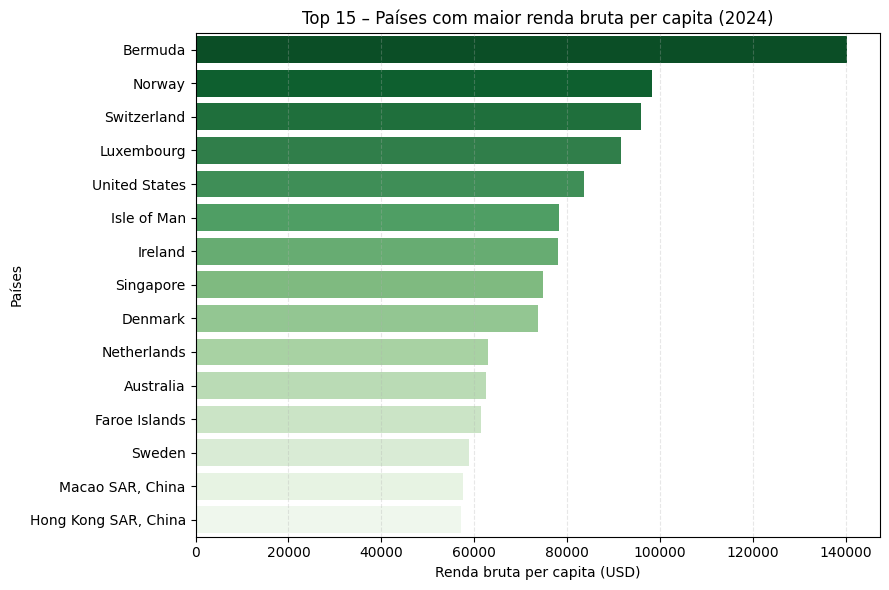

In [64]:
plt.figure(figsize=(9,6))
sns.barplot(data=maioresRendasPaises, y="pais", x="renda_bruta_per_capita_usd", palette="Greens_r")
plt.title("Top 15 – Países com maior renda bruta per capita (2024)")
plt.xlabel("Renda bruta per capita (USD)")
plt.ylabel("Países")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


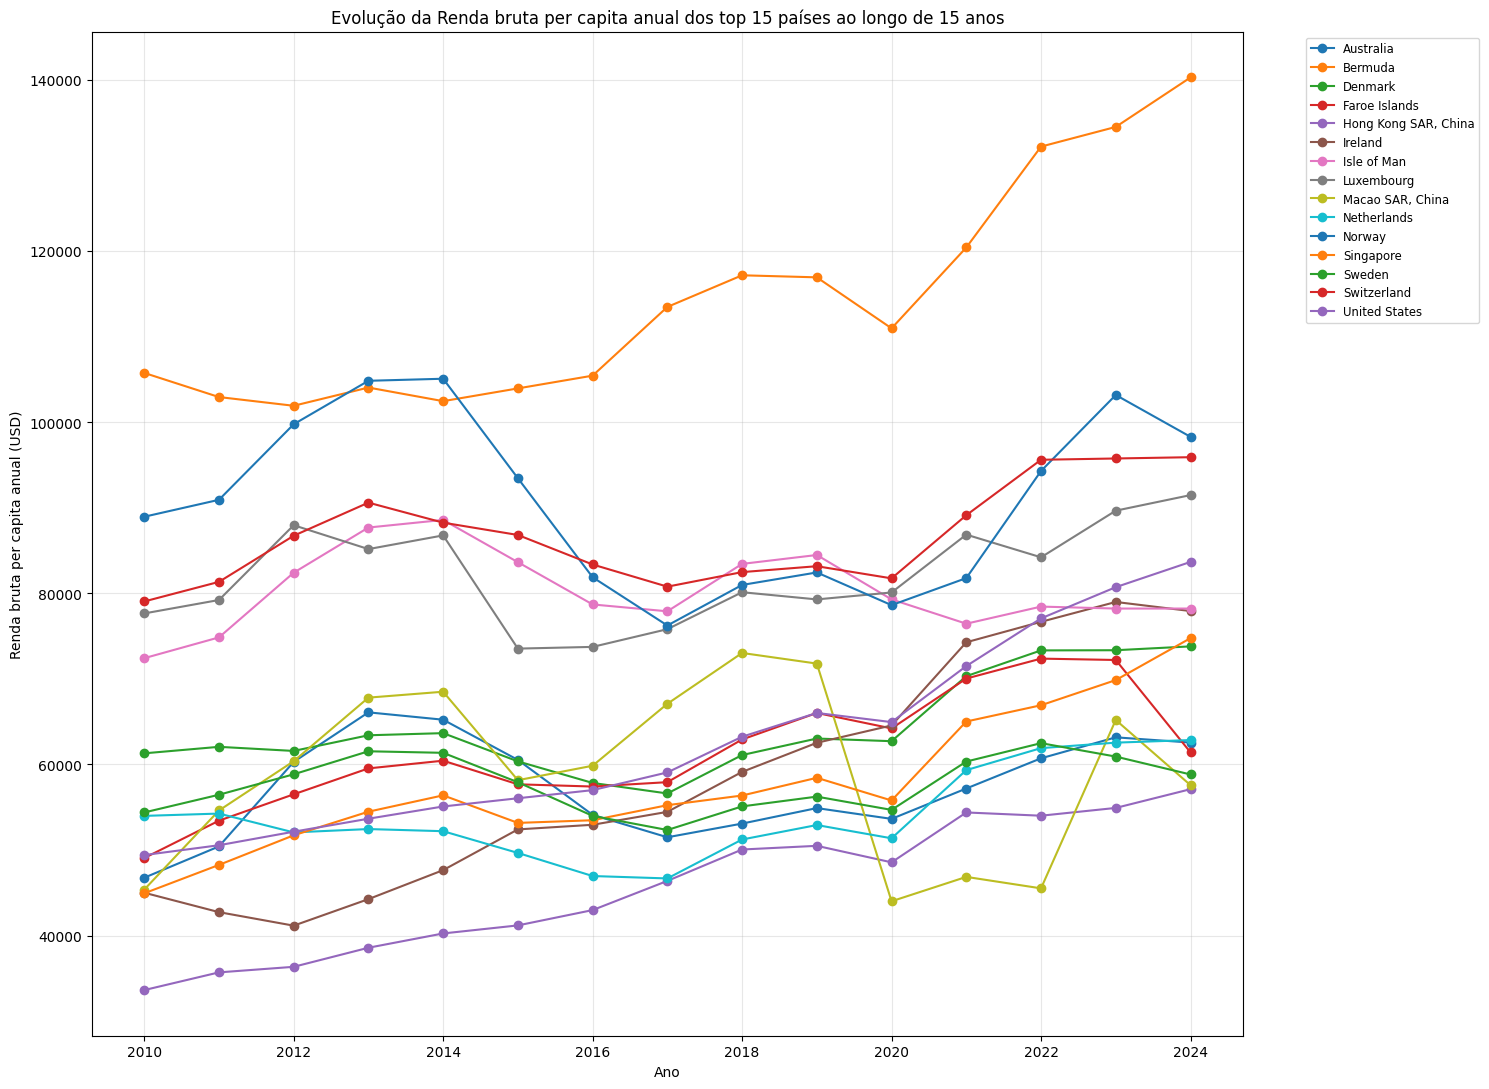

In [65]:
# Lista dos países com maior inflação
rendasPaises = maioresRendasPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países
df_renda_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(rendasPaises)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de linhas múltiplas
plt.figure(figsize=(15,11))
for pais, sub in df_renda_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["renda_bruta_per_capita_usd"], marker="o", label=pais)

plt.title("Evolução da Renda bruta per capita anual dos top 15 países ao longo de 15 anos")
plt.xlabel("Ano")
plt.ylabel("Renda bruta per capita anual (USD)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Top 15 paises com maiores crescimentos econômicos em 2024


In [81]:
# Filtrar apenas o ano de 2024
df_cresc_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024]

# Selecionar os 15 países com maior crescimento econômico
maioresCrescimentoPaises = df_cresc_2024.sort_values(by='crescimento_pib_anual', ascending=False).head(15).reset_index(drop=True)
# abrindo visualização na tabela
# Visualizar o resultado
maioresCrescimentoPaises[['pais', 'crescimento_pib_anual']]



,pais,crescimento_pib_anual
0,Guyana,43.37
1,Samoa,9.42
2,Kyrgyz Republic,9.04
3,"Macao SAR, China",8.81
4,Niger,8.42
5,Tajikistan,8.40
6,Belize,8.15
7,Benin,7.45
8,Ethiopia,7.32
9,Cabo Verde,7.27


**Países com maior crescimento de PIB
*nao estou considerando Macao como China*
23 - China 4,98
32- Russia 4,34

/tmp/ipython-input-82-2288843914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresCrescimentoPaises, y="pais", x="crescimento_pib_anual", palette="Greens_r")


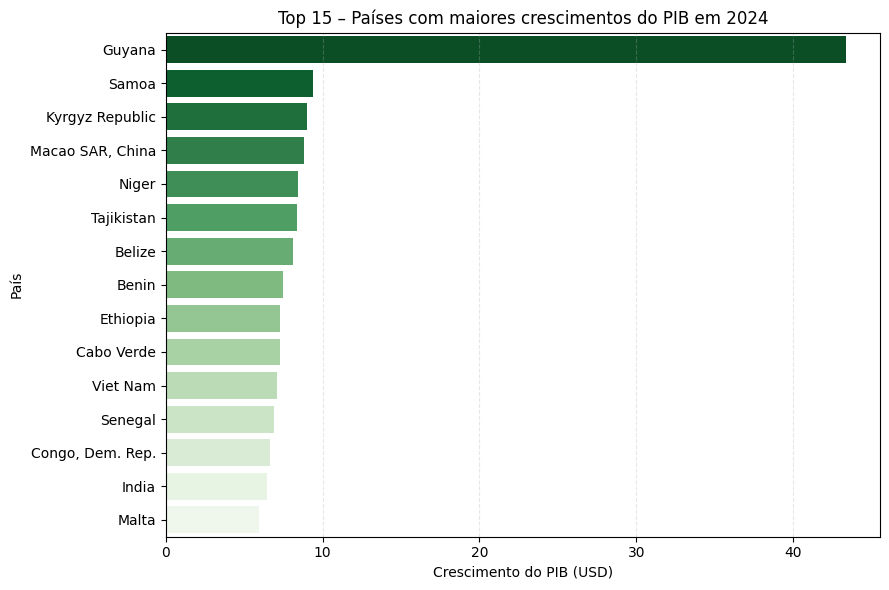

In [82]:
plt.figure(figsize=(9,6))
sns.barplot(data=maioresCrescimentoPaises, y="pais", x="crescimento_pib_anual", palette="Greens_r")
plt.title("Top 15 – Países com maiores crescimentos do PIB em 2024")
plt.xlabel("Crescimento do PIB (USD)")
plt.ylabel("País")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


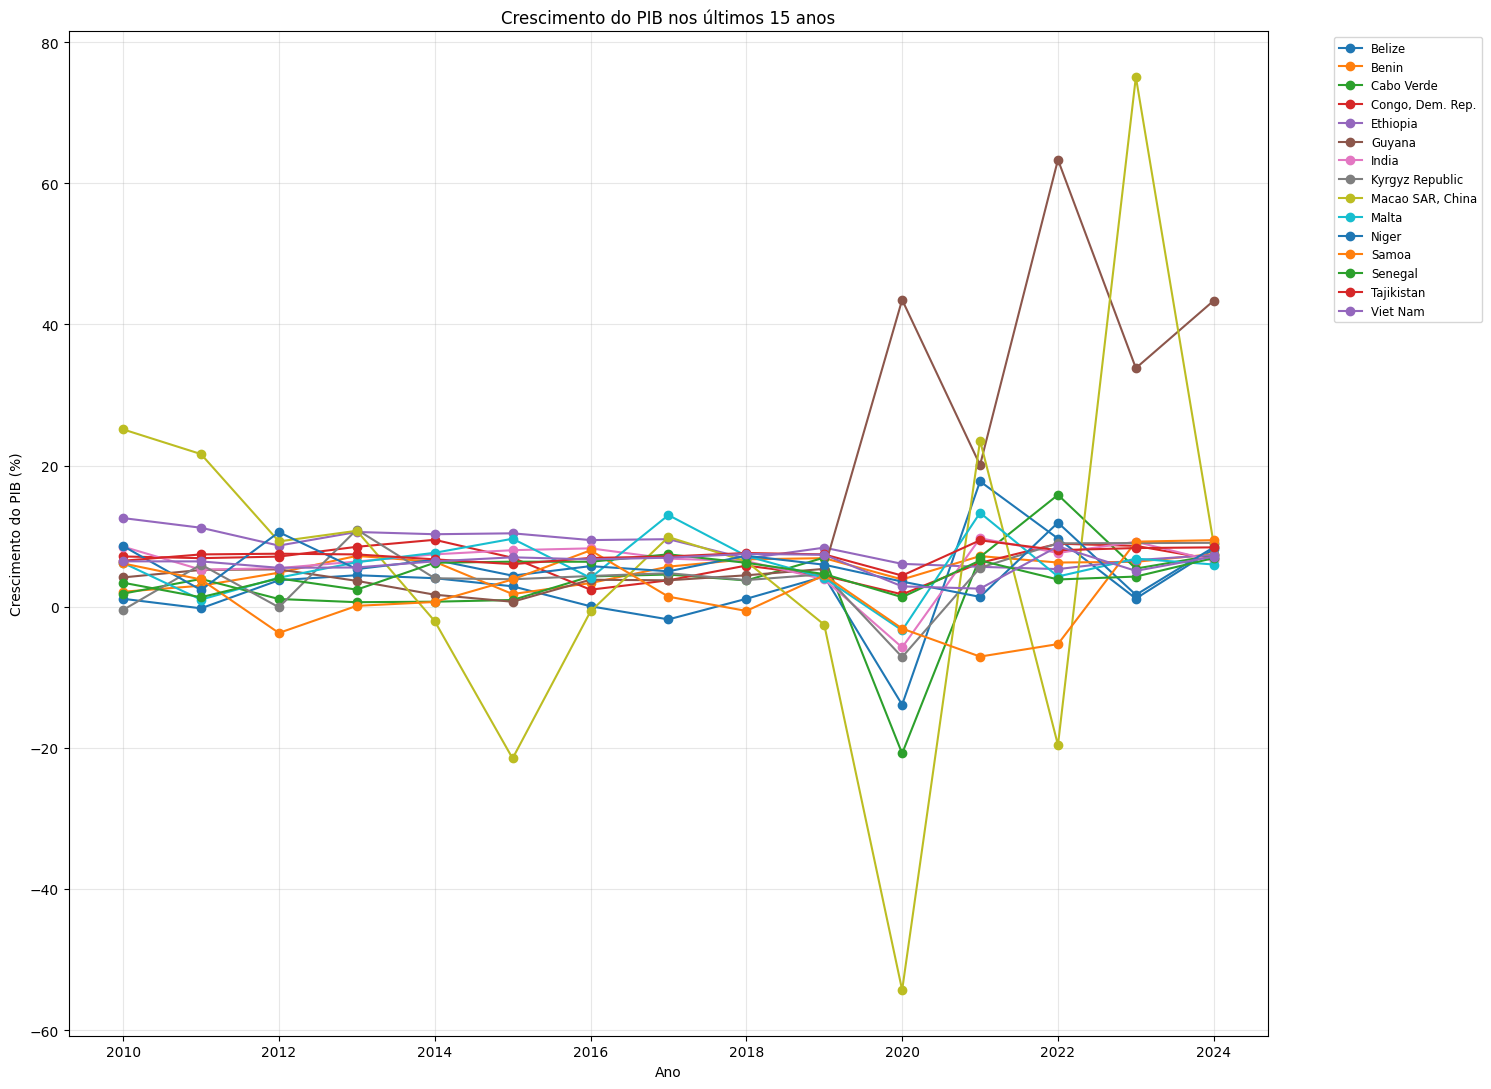

In [83]:
crescimentoPaises = maioresCrescimentoPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países e sem os nulos
df_cresc_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(crescimentoPaises)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de tendência
plt.figure(figsize=(15,11))
for pais, sub in df_cresc_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["crescimento_pib_anual"], marker="o", label=pais)

plt.title("Crescimento do PIB nos últimos 15 anos")
plt.xlabel("Ano")
plt.ylabel("Crescimento do PIB (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Top 15 países com as melhores e piores taxas de câmbio frente ao (USD)

In [85]:
# Filtrar apenas o ano de 2024
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Selecionar os 15 países com maior crescimento econômico
melhoresTaxaCambioPaises = df_cambio_2024[['pais', 'taxa_cambio_local_usd']].sort_values(by='taxa_cambio_local_usd', ascending=True).head(15).reset_index(drop=True) #abri visualização na tabela

# Visualizar o resultado
melhoresTaxaCambioPaises[['pais', 'taxa_cambio_local_usd']]



,pais,taxa_cambio_local_usd
0,Bahrain,0.38
1,Oman,0.38
2,Jordan,0.71
3,Gibraltar,0.78
4,Isle of Man,0.78
5,United Kingdom,0.78
6,Cayman Islands,0.83
7,Switzerland,0.88
8,Greece,0.92
9,Finland,0.92


**Piores relação dolar-moeda local**
em outras palavras - quanto o dolar vale para a moeda local - foco de investimentos

5 - Reino Unido - 0,78
19- Portugal / Espanha / Italia / 1,00 - Bloco do Euro
39 - Canada - 1,37
41 - Australia - 1,52


/tmp/ipython-input-70-425330118.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


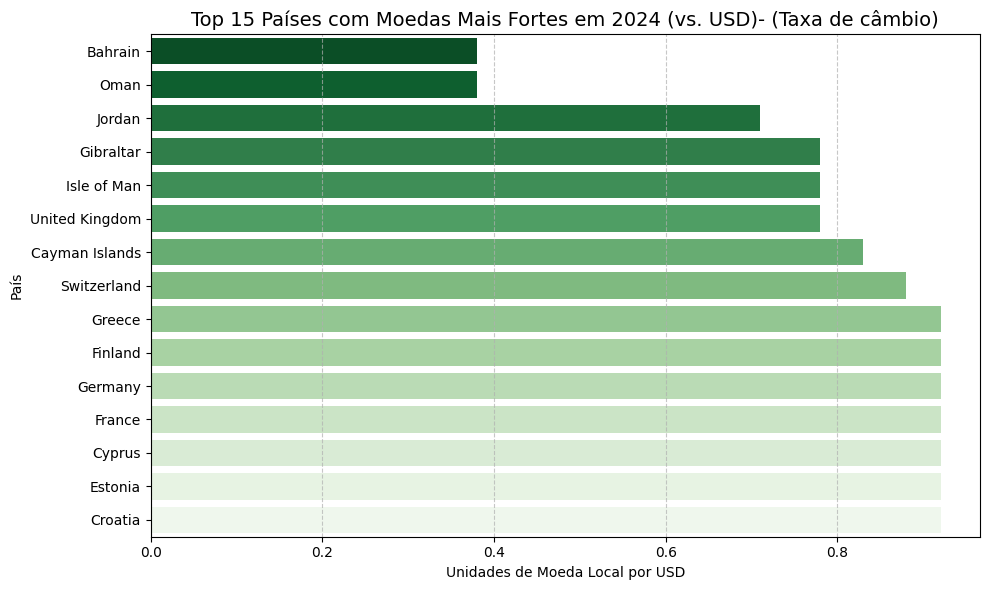

In [70]:
# Filtrar 2024 e remover valores nulos de taxa de câmbio
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Ordenar do menor para o maior (moedas mais fortes primeiro)
top15_cambio = df_cambio_2024.sort_values(by='taxa_cambio_local_usd').head(15)

# Gráfico horizontal
plt.figure(figsize=(10,6))
sns.barplot(
    data=top15_cambio,
    x='taxa_cambio_local_usd',
    y='pais',
    palette='Greens_r'
)
plt.title('Top 15 Países com Moedas Mais Fortes em 2024 (vs. USD)- (Taxa de câmbio)', fontsize=14)
plt.xlabel('Unidades de Moeda Local por USD')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Interpretação rápida:**
Moeda forte, o consumidor paga menor em dólares, então o vinho brasileiro ficaria relativamente mais barato nesses mercados.
Países do golfo como (Kuwait, Bahrain/ Omã) possuiem a população pequena, renda per capita alta, câmbio fixo, seriam países com bom potencial.

---





#### Paises com as piores taxas de câmbio

In [86]:
# Filtrar apenas o ano de 2024
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Selecionar os 15 países com maiores taxas de cambio
melhoresTaxaCambioPaises = df_cambio_2024[['pais', 'taxa_cambio_local_usd']].sort_values(by='taxa_cambio_local_usd', ascending=False).head(15).reset_index(drop=True) #Abri visualização

# Visualizar o resultado
melhoresTaxaCambioPaises[['pais', 'taxa_cambio_local_usd']]



,pais,taxa_cambio_local_usd
0,Lebanon,89500.000000
1,Viet Nam,24164.890000
2,Indonesia,15855.450000
3,Paraguay,7560.250000
4,Colombia,4074.430000
5,Tanzania,2597.900000
6,Nigeria,1478.970000
7,"Korea, Rep.",1363.380000
8,"Congo, Dem. Rep.",1350.532667
9,Iraq,1300.000000


**Paises com o pior cambio frente ao dolar**
 3 - Paraguai - nao conta, economia é dolarizada informalmente
 10 - Chile - 943 - acho que a economia é dolarizada informalmente também.
 31 - Japao - 151,37 - acho que o cambio é artifical, propositalmente, como acontece com a china, desvaloriza para chamar investimentos
 34 - Haiti - 131,81
 42 - India - 83,67
 47 - Russia 53,71
 49 - Uruguai - 40,21
 59- Africa do Sul - 18,33

/tmp/ipython-input-87-158045103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


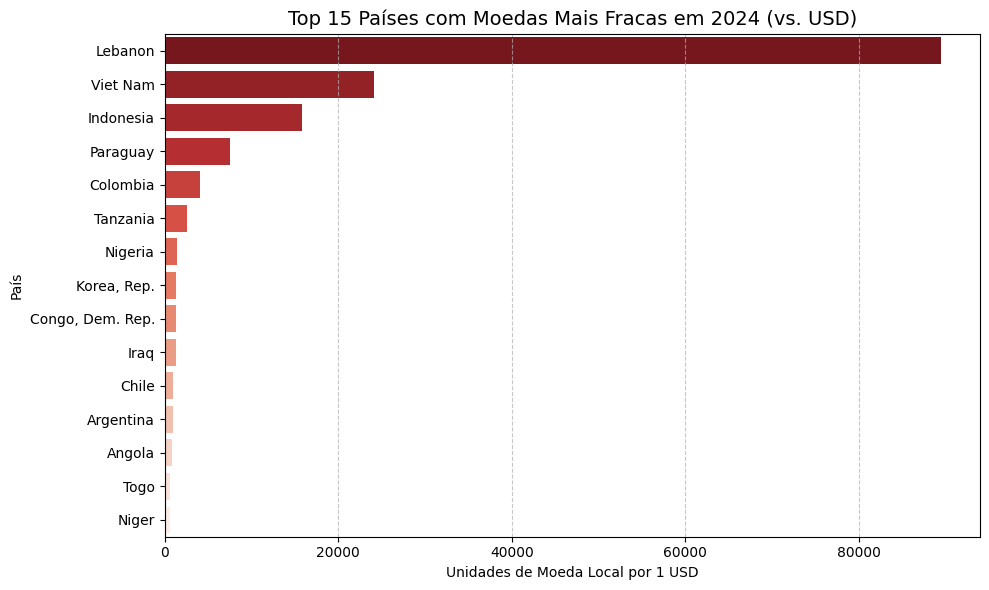

In [87]:
# Ordenar (moedas mais fracas primeiro)
top15_cambio = df_cambio_2024.sort_values(by='taxa_cambio_local_usd').head(15)

# Gráfico horizontal
plt.figure(figsize=(10,6))
sns.barplot(
    data=melhoresTaxaCambioPaises,
    x='taxa_cambio_local_usd',
    y='pais',
    palette='Reds_r'
)
plt.title('Top 15 Países com Moedas Mais Fracas em 2024 (vs. USD)', fontsize=14)
plt.xlabel('Unidades de Moeda Local por 1 USD')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Interpretação rápida:** Países onde o vinho brasileiro tende a ficar mais caro

### Quais países têm moeda forte (taxa de câmbio baixa) e alta renda bruta per capita em 2024?

In [88]:
df_compa_2024 = df_economiaPaises[df_economiaPaises["ano"] == 2024].copy()

# moeda forte
comparaMoedaForte = df_compa_2024["taxa_cambio_local_usd"] <= 1

# renda alta (top 25 %)
limite_renda = df_compa_2024["renda_bruta_per_capita_usd"].quantile(0.75)
renda_alta = df_compa_2024["renda_bruta_per_capita_usd"] >= limite_renda

# países que satisfazem ambos
mercados_premium = df_2024[comparaMoedaForte & renda_alta][
    ["pais", "renda_bruta_per_capita_usd", "taxa_cambio_local_usd"]
].sort_values(by="renda_bruta_per_capita_usd", ascending=False).reset_index(drop=True)

mercados_premium


,pais,renda_bruta_per_capita_usd,taxa_cambio_local_usd
0,Bermuda,140280.000000,1.00
1,Switzerland,95900.000000,0.88
2,Luxembourg,91470.000000,0.92
3,United States,83660.000000,1.00
4,Isle of Man,78211.428571,0.78
5,Ireland,77920.000000,0.92
6,Netherlands,62840.000000,0.92
7,Cayman Islands,56869.230769,0.83
8,Germany,54960.000000,0.92
9,Belgium,54840.000000,0.92


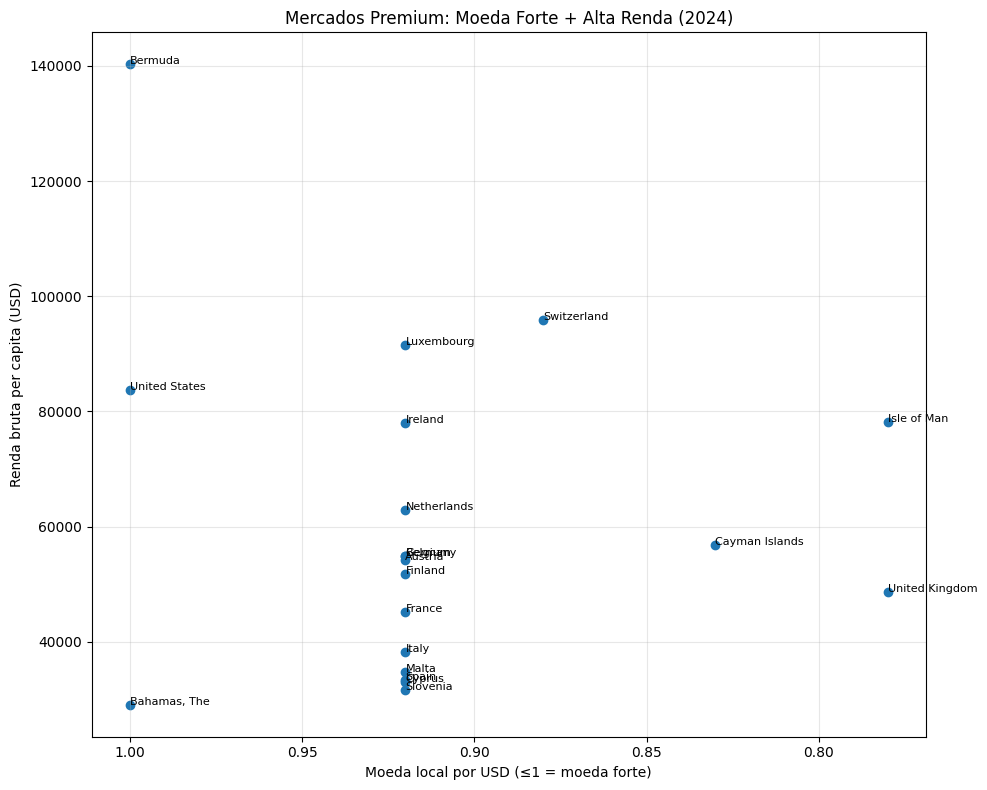

In [89]:
# Gerando um gráfico de Scatter
plt.figure(figsize=(10,8))
plt.scatter(
    mercados_premium["taxa_cambio_local_usd"],
    mercados_premium["renda_bruta_per_capita_usd"]
)
for _, row in mercados_premium.iterrows():
    plt.text(row["taxa_cambio_local_usd"], row["renda_bruta_per_capita_usd"], row["pais"], fontsize=8)

plt.gca().invert_xaxis()  # moeda mais forte (<=1) à esquerda
plt.xlabel("Moeda local por USD (≤1 = moeda forte)")
plt.ylabel("Renda bruta per capita (USD)")
plt.title("Mercados Premium: Moeda Forte + Alta Renda (2024)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Interpretação rápida:** Esquerda para cima nos mostra moeda forte mais uma renda alta.

### Filtro de países com critérios específicos

In [90]:
# Filtros com base nos critérios atualizados
filtro_estrategico = (
    (df_economiaPaises['pib_usd_corrente'] > 3.302671e+11) &
    (df_economiaPaises['inflacao_anual'] < 3.50) &
    (df_economiaPaises['taxa_cambio_local_usd'] < 5.00) &
    (df_economiaPaises['renda_bruta_per_capita_usd'] > 23030.00)
)

# Aplicar filtro
df_paises_estrategicos = df_economiaPaises[filtro_estrategico]

# Ver países únicos filtrados
paises_estrategicos = df_paises_estrategicos['pais'].unique()
print(paises_estrategicos)


['Australia' 'Austria' 'Belgium' 'Canada' 'France' 'Germany' 'Ireland'
 'Italy' 'Netherlands' 'Singapore' 'Spain' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


### Top 15 países estratégios com alto potencial de investimento
 - Australia
 - Austria
 - Belgium
 - Canada
 - France
 - Germany
 - Ireland
 - Italy
 - Netherlands
 - Singapore
 - Spain
 - Switzerland'
 - United Arab Emirates
 - United Kingdom
 - United States